<a href="https://colab.research.google.com/github/bspoloo/SIS420-012024/blob/main/Parciales/Segundo%20Parcial/Aprendizaje%20no%20supervisado/D2(171).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset 13

### K-Means

algoritmo de "agrupamiento por centroides", lo que significa que intenta dividir los datos en k clusters donde cada cluster está representado por un centroide, que es el punto medio de los puntos que pertenecen a ese cluster.

#### Librerias

In [1]:
#Generar conjuntos de datos simulados con una distribución específica
from sklearn.datasets import make_blobs
# Manejo de matrices y vectores
import numpy as np

# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

import pandas as pd
#Tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
# tells matplotlib to embed plots within the notebook
#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split
%matplotlib inline

## K-Means para aprendizaje no supervisado.

Semi-supervisado se entrena con datasets parcialmente etiquetados.

In [2]:
def featureNormalize(X):
    # Creamos una copia del array X para no modificar el original
    X_norm = X.copy()

    # Inicializamos arrays de ceros para almacenar la media y desviación estándar de cada columna
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # Calculamos el promedio (media) de cada columna de X
    mu = np.mean(X, axis=0)

    # Calculamos la desviación estándar de cada columna de X
    sigma = np.std(X, axis=0)

    # Normalizamos cada columna de X restando el promedio y dividiendo por la desviación estándar
    X_norm = (X - mu) / sigma

    # Devolvemos el array normalizado junto con el promedio y la desviación estándar
    return X_norm, mu, sigma


In [7]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Carga del dataset

In [4]:
def graficar_imagenes(data, num_images=5):
    # No graficar más imágenes de las que existen en el dataset
    num_images = min(num_images, len(data))

    # Establecer el tamaño de la figura en función del número de imágenes
    plt.figure(figsize=(10, 2 * num_images))

    for i in range(num_images):
        # Extrae la imagen de la fila i y la redimensiona
        image = data.iloc[i].values
        image = image.reshape(32, 32, 3)
        image = image.astype(np.uint8)

        # Crear un subplot para cada imagen
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.axis('off')  # Ocultar los ejes

    # Mostrar todas las imágenes
    plt.show()


In [10]:
dataset = pd.read_csv('/content/gdrive/MyDrive/SIS420/Examen Final/dataset_13.csv', delimiter=',')

dataset.head()

0    1    2    3    4    5    6    7    8    9  ...  3062  3063  3064  \
0   30  111  198   30  111  198   30  111  198   30  ...   255   255   255   
1   71   69   47   71   69   47   71   69   47   71  ...   255   255   255   
2  255  255  255  255  255  255  255  255  255  255  ...   255   255   255   
3  255  255  255  255  255  255  255  255  255  255  ...   255   255   255   
4  255  255  255  255  255  255  255  255  255  255  ...   255   255   255   

   3065  3066  3067  3068  3069  3070  3071  
0   255   255   255   255   255   255   255  
1   255   255   255   255   255   255   255  
2   255   255   255   255   255   255   255  
3   255   255   255   255   255   255   255  
4   255   255   255   255   255   255   255  

[5 rows x 3072 columns]

In [11]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3072 entries, 0 to 3071
dtypes: int64(3072)
memory usage: 1.1 GB


In [14]:
dataset.describe()

0             1             2             3             4  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean     174.611840    174.297940    174.840540    176.165260    175.883840   
std       84.948401     85.419686     84.869923     84.852648     85.330859   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      102.000000    100.000000    102.000000    104.000000    102.000000   
50%      202.000000    203.000000    203.000000    206.000000    207.000000   
75%      255.000000    255.000000    255.000000    255.000000    255.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

                  5             6            7             8             9  \
count  50000.000000  50000.000000  50000.00000  50000.000000  50000.000000   
mean     176.415400    179.016120    178.61794    179.141880    184.388840   
std       84.736957     84.565459     85.10827     84.501012     83.754328   
min        0.000000      0.000000      0.00000      0.000000      0.000000   
25%      104.000000    107.000000    106.00000    108.000000    115.000000   
50%      206.000000    214.000000    214.00000    214.000000    230.000000   
75%      255.000000    255.000000    255.00000    255.000000    255.000000   
max      255.000000    255.000000    255.00000    255.000000    255.000000   

       ...          3062          3063          3064        3065         3066  \
count  ...  50000.000000  50000.000000  50000.000000  50000.0000  50000.00000   
mean   ...    254.042440    254.107940    254.173200    254.1760    254.25136   
std    ...     12.803581     12.494535     11.836239     11.8902     11.56562   
min    ...      0.000000      0.000000      0.000000      0.0000      0.00000   
25%    ...    255.000000    255.000000    255.000000    255.0000    255.00000   
50%    ...    255.000000    255.000000    255.000000    255.0000    255.00000   
75%    ...    255.000000    255.000000    255.000000    255.0000    255.00000   
max    ...    255.000000    255.000000    255.000000    255.0000    255.00000   

               3067          3068          3069          3070          3071  
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000  
mean     254.302240    254.311260    254.508140    254.533220    254.523660  
std       10.902928     10.914358      9.334714      8.893397      9.232325  
min        1.000000      0.000000      0.000000      1.000000      0.000000  
25%      255.000000    255.000000    255.000000    255.000000    255.000000  
50%      255.000000    255.000000    255.000000    255.000000    255.000000  
75%      255.000000    255.000000    255.000000    255.000000    255.000000  
max      255.000000    255.000000    255.000000    255.000000    255.000000  

[8 rows x 3072 columns]

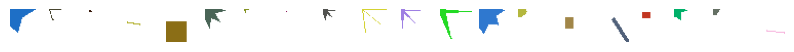

In [12]:
graficar_imagenes(dataset, num_images=20)

In [13]:
#Valores nulos
dataset.isna().any()

0       False
1       False
2       False
3       False
4       False
        ...  
3067    False
3068    False
3069    False
3070    False
3071    False
Length: 3072, dtype: bool

#### Normalizacion de las caracteristicas

In [15]:
print("Cantidad total de datos: ", dataset.shape[0])

Cantidad total de datos:  50000


In [16]:
#Valor mínimo y máximo muy diferentes, se procede a normalizar
dataset.describe()

0             1             2             3             4  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean     174.611840    174.297940    174.840540    176.165260    175.883840   
std       84.948401     85.419686     84.869923     84.852648     85.330859   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      102.000000    100.000000    102.000000    104.000000    102.000000   
50%      202.000000    203.000000    203.000000    206.000000    207.000000   
75%      255.000000    255.000000    255.000000    255.000000    255.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

                  5             6            7             8             9  \
count  50000.000000  50000.000000  50000.00000  50000.000000  50000.000000   
mean     176.415400    179.016120    178.61794    179.141880    184.388840   
std       84.736957     84.565459     85.10827     84.501012     83.754328   
min        0.000000      0.000000      0.00000      0.000000      0.000000   
25%      104.000000    107.000000    106.00000    108.000000    115.000000   
50%      206.000000    214.000000    214.00000    214.000000    230.000000   
75%      255.000000    255.000000    255.00000    255.000000    255.000000   
max      255.000000    255.000000    255.00000    255.000000    255.000000   

       ...          3062          3063          3064        3065         3066  \
count  ...  50000.000000  50000.000000  50000.000000  50000.0000  50000.00000   
mean   ...    254.042440    254.107940    254.173200    254.1760    254.25136   
std    ...     12.803581     12.494535     11.836239     11.8902     11.56562   
min    ...      0.000000      0.000000      0.000000      0.0000      0.00000   
25%    ...    255.000000    255.000000    255.000000    255.0000    255.00000   
50%    ...    255.000000    255.000000    255.000000    255.0000    255.00000   
75%    ...    255.000000    255.000000    255.000000    255.0000    255.00000   
max    ...    255.000000    255.000000    255.000000    255.0000    255.00000   

               3067          3068          3069          3070          3071  
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000  
mean     254.302240    254.311260    254.508140    254.533220    254.523660  
std       10.902928     10.914358      9.334714      8.893397      9.232325  
min        1.000000      0.000000      0.000000      1.000000      0.000000  
25%      255.000000    255.000000    255.000000    255.000000    255.000000  
50%      255.000000    255.000000    255.000000    255.000000    255.000000  
75%      255.000000    255.000000    255.000000    255.000000    255.000000  
max      255.000000    255.000000    255.000000    255.000000    255.000000  

[8 rows x 3072 columns]

In [17]:
dataset_norm, mu, sigma = featureNormalize(dataset)
dataset_norm.describe()

0             1             2             3             4  \
count  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04   
mean  -2.032152e-17 -1.594458e-16 -4.320100e-17  1.291056e-16  8.139267e-17   
std    1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00   
min   -2.055525e+00 -2.040510e+00 -2.060121e+00 -2.076152e+00 -2.061219e+00   
25%   -8.547844e-01 -8.698075e-01 -8.582695e-01 -8.504859e-01 -8.658600e-01   
50%    3.224126e-01  3.360156e-01  3.317988e-01  3.516100e-01  3.646567e-01   
75%    9.463270e-01  9.447807e-01  9.445073e-01  9.290874e-01  9.271787e-01   
max    9.463270e-01  9.447807e-01  9.445073e-01  9.290874e-01  9.271787e-01   

                  5             6             7             8             9  \
count  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04   
mean  -8.427037e-17 -1.733724e-17 -5.698553e-17  1.764988e-16  1.359979e-16   
std    1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00   
min   -2.081939e+00 -2.116915e+00 -2.098735e+00 -2.120018e+00 -2.201566e+00   
25%   -8.545991e-01 -8.516106e-01 -8.532504e-01 -8.419141e-01 -8.284889e-01   
50%    3.491381e-01  4.136941e-01  4.157341e-01  4.125213e-01  5.445882e-01   
75%    9.274039e-01  8.985304e-01  8.974783e-01  8.977275e-01  8.430832e-01   
max    9.274039e-01  8.985304e-01  8.974783e-01  8.977275e-01  8.430832e-01   

       ...          3062          3063          3064          3065  \
count  ...  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04   
mean   ...  8.185452e-17 -1.071783e-15 -7.081269e-16  1.047127e-15   
std    ...  1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00   
min    ... -1.984171e+01 -2.033773e+01 -2.147437e+01 -2.137715e+01   
25%    ...  7.478920e-02  7.139673e-02  6.985397e-02  6.930146e-02   
50%    ...  7.478920e-02  7.139673e-02  6.985397e-02  6.930146e-02   
75%    ...  7.478920e-02  7.139673e-02  6.985397e-02  6.930146e-02   
max    ...  7.478920e-02  7.139673e-02  6.985397e-02  6.930146e-02   

               3066          3067          3068          3069          3070  \
count  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04   
mean  -4.433076e-16 -1.091678e-15 -3.871037e-16  2.847145e-16 -1.975309e-17   
std    1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00   
min   -2.198359e+01 -2.323273e+01 -2.330085e+01 -2.726497e+01 -2.850831e+01   
25%    6.473042e-02  6.399813e-02  6.310467e-02  5.269202e-02  5.248665e-02   
50%    6.473042e-02  6.399813e-02  6.310467e-02  5.269202e-02  5.248665e-02   
75%    6.473042e-02  6.399813e-02  6.310467e-02  5.269202e-02  5.248665e-02   
max    6.473042e-02  6.399813e-02  6.310467e-02  5.269202e-02  5.248665e-02   

               3071  
count  5.000000e+04  
mean  -7.432277e-16  
std    1.000010e+00  
min   -2.756903e+01  
25%    5.159532e-02  
50%    5.159532e-02  
75%    5.159532e-02  
max    5.159532e-02  

[8 rows x 3072 columns]

In [18]:
# Duplicados
duplicados = dataset_norm.duplicated().sum()
print(f'Número de duplicados: {duplicados}')

# Eliminar duplicados
dataset_norm_dedup = dataset_norm.drop_duplicates()

Número de duplicados: 0


In [19]:
dataset_norm_dedup

0         1         2         3         4         5         6  \
0     -1.702366 -0.741030  0.272885 -1.722595 -0.760387  0.254727 -1.762157   
1     -1.219715 -1.232725 -1.506327 -1.239399 -1.252594 -1.527276 -1.277321   
2      0.946327  0.944781  0.944507  0.929087  0.927179  0.927404  0.898530   
3      0.946327  0.944781  0.944507  0.929087  0.927179  0.927404  0.898530   
4      0.946327  0.944781  0.944507  0.929087  0.927179  0.927404  0.898530   
...         ...       ...       ...       ...       ...       ...       ...   
49995 -0.760609  0.441379 -0.516567 -0.779774  0.423253 -0.535963 -0.816135   
49996  0.946327  0.944781  0.944507 -0.143371  0.376376 -0.937208  0.898530   
49997  0.287097  0.101875 -0.434087  0.269113  0.083396 -0.453353  0.236315   
49998  0.946327  0.944781  0.944507  0.929087  0.927179  0.927404  0.898530   
49999 -0.066062 -0.729323 -0.811138 -0.084444 -0.748668 -0.830996 -0.118443   

              7         8         9  ...      3062      3063      3064  \
0     -0.794501  0.223173 -1.843372  ...  0.074789  0.071397  0.069854   
1     -1.287995 -1.563806 -1.353840  ...  0.074789  0.071397  0.069854   
2      0.897478  0.897727  0.843083  ...  0.074789  0.071397  0.069854   
3      0.897478  0.897727  0.843083  ...  0.074789  0.071397  0.069854   
4      0.897478  0.897727  0.843083  ...  0.074789  0.071397  0.069854   
...         ...       ...       ...  ...       ...       ...       ...   
49995  0.392234 -0.569725 -0.888188  ...  0.074789  0.071397  0.069854   
49996  0.897478  0.897727 -0.243439  ...  0.074789  0.071397  0.069854   
49997  0.051489 -0.486885  0.174454  ...  0.074789  0.071397  0.069854   
49998  0.897478  0.897727  0.843083  ...  0.074789  0.071397  0.069854   
49999 -0.782751 -0.865583 -0.183740  ...  0.074789  0.071397  0.069854   

           3065     3066      3067      3068      3069      3070      3071  
0      0.069301  0.06473  0.063998  0.063105  0.052692  0.052487  0.051595  
1      0.069301  0.06473  0.063998  0.063105  0.052692  0.052487  0.051595  
2      0.069301  0.06473  0.063998  0.063105  0.052692  0.052487  0.051595  
3      0.069301  0.06473  0.063998  0.063105  0.052692  0.052487  0.051595  
4      0.069301  0.06473  0.063998  0.063105  0.052692  0.052487  0.051595  
...         ...      ...       ...       ...       ...       ...       ...  
49995  0.069301  0.06473  0.063998  0.063105  0.052692  0.052487  0.051595  
49996  0.069301  0.06473  0.063998  0.063105  0.052692  0.052487  0.051595  
49997  0.069301  0.06473  0.063998  0.063105  0.052692  0.052487  0.051595  
49998  0.069301  0.06473  0.063998  0.063105  0.052692  0.052487  0.051595  
49999  0.069301  0.06473  0.063998  0.063105  0.052692  0.052487  0.051595  

[50000 rows x 3072 columns]

#### Calculo del numero de clusters

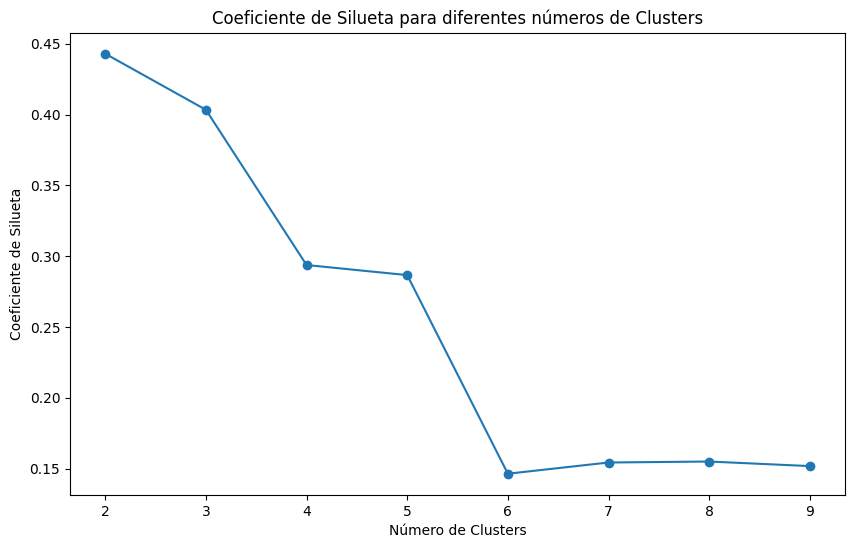

In [20]:
#Método de Silueta, calidad del clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(dataset_norm[:2000])
    score = silhouette_score(dataset_norm[:2000], labels)
    silhouette_scores.append(score)

# Graficar el coeficiente de silueta
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para diferentes números de Clusters')
plt.show()

#cluster grupo de puntos de datos similares entre si y diferentes de los puntos de otros clusters, definidos por centroides
#calculo calcula como el promedio de los coeficientes de silueta individuales de todos los punto

In [21]:
#calidad del clustering, va de 1 a -1, mas cerca a 1 mejor agrupado
silhouette_scores

[0.4429331168913608,
 0.4033272660742383,
 0.29370913870773524,
 0.2865936828140667,
 0.14632621638864693,
 0.1542446341639759,
 0.1549390289252757,
 0.15171661346764775]

In [22]:
max_score_idx = np.argmax(silhouette_scores) + 2
max_score = max(silhouette_scores)
print("El mejor valor de K es:", max_score_idx, "con coeficiente de silueta de:", max_score)

El mejor valor de K es: 2 con coeficiente de silueta de: 0.4429331168913608


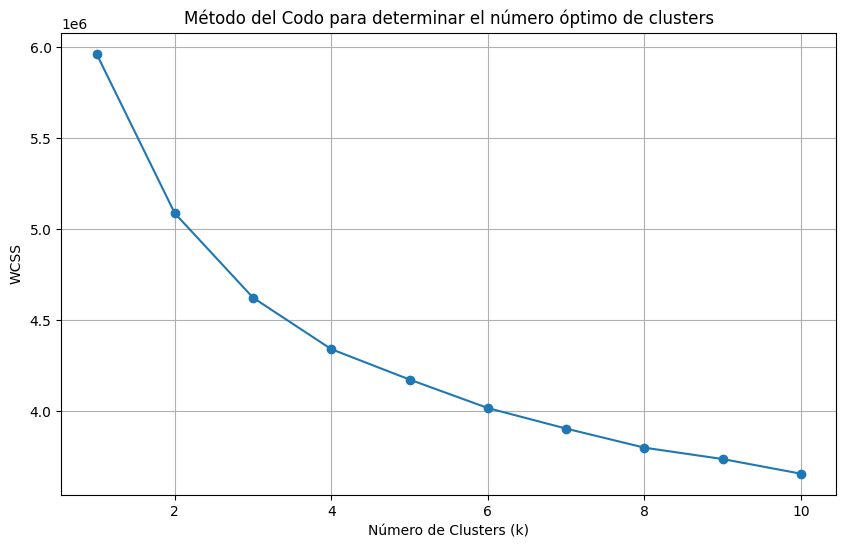

In [23]:
# Método de codo
def optimal_number_of_clusters(X, max_k=20):
    wcss = []
    valores_k = list(range(1, max_k + 1))

    for k in valores_k:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Graficar WCSS
    plt.figure(figsize=(10, 6))
    plt.plot(valores_k, wcss, marker='o')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('WCSS')
    plt.title('Método del Codo para determinar el número óptimo de clusters')
    plt.grid(True)
    plt.show()

    # Encontrar el punto de codo
    diff_wcss = np.diff(wcss)
    second_diff_wcss = np.diff(diff_wcss)
    optimal_k = np.argmin(second_diff_wcss)

    return optimal_k

# Uso de la función
optimal_k = optimal_number_of_clusters(dataset_norm[:2000], max_k=10)

haciendo predicciones para ver a que grupo pertenece algunos datos insertados:

In [24]:
#evaluamos la inercia, medida de cuan compactos y bien separados estan los clusters.
import numpy as np
from sklearn.cluster import KMeans

#nuestro k es 13
k1 = max_score_idx #-> del método de la silueta
k2 = optimal_k#-> del metodo del codo
valores_K = [k1, k2]
best_kmeans = None

for k in valores_K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset_norm)
    print("k = ", k, "inertia = ", kmeans.inertia_)

    if (best_kmeans is None or
        kmeans.inertia_ < best_kmeans.inertia_):
        best_kmeans = kmeans

print("el mejor k es: ", best_kmeans.n_clusters)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k =  2 inertia =  131915298.89578952


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k =  7 inertia =  102667029.20115751
el mejor k es:  7


In [25]:
kmeans = best_kmeans

In [26]:
#cómo se ha dividido el conjunto de datos en dos grupos distintos según las características y la distancia entre los puntos
for i in range(2):
    print("La cantidad de elementos en el grupo ",i," es de: ",len(kmeans.labels_[ kmeans.labels_ == i ]) )

La cantidad de elementos en el grupo  0  es de:  10216
La cantidad de elementos en el grupo  1  es de:  1343


In [27]:
#a que cluster pertenece cada conjunto
dataset['Cluster'] = kmeans.labels_
dataset.head()

0    1    2    3    4    5    6    7    8    9  ...  3063  3064  3065  \
0   30  111  198   30  111  198   30  111  198   30  ...   255   255   255   
1   71   69   47   71   69   47   71   69   47   71  ...   255   255   255   
2  255  255  255  255  255  255  255  255  255  255  ...   255   255   255   
3  255  255  255  255  255  255  255  255  255  255  ...   255   255   255   
4  255  255  255  255  255  255  255  255  255  255  ...   255   255   255   

   3066  3067  3068  3069  3070  3071  Cluster  
0   255   255   255   255   255   255        0  
1   255   255   255   255   255   255        2  
2   255   255   255   255   255   255        2  
3   255   255   255   255   255   255        2  
4   255   255   255   255   255   255        4  

[5 rows x 3073 columns]

#### Visualizando los clusters que se formaron

Aqui aplicamos el analisis de componentes principales para darnos una idea de como se formaron los clusters, esto debido a que no podemos graficar todas las caracteristicas debido a su dimension.

Para esto usaremos y la libreria de `PCA`, para indicar que solo queremos los dos componentes principales.

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_dataset = pca.fit_transform(dataset_norm)

# Creamos un DataFrame con los dos valores de los componentes principales
pca_dataset_df = pd.DataFrame(data=pca_dataset, columns=['Componente_1', 'Componente_2'])
pca_nombres_df = pd.concat([pca_dataset_df, dataset['Cluster']], axis=1)

pca_nombres_df

Componente_1  Componente_2  Cluster
0         15.249766    -26.881580        0
1        -17.652726     -0.549003        2
2        -19.406504      2.305207        2
3        -17.643266      2.178826        2
4         55.703587     39.930449        4
...             ...           ...      ...
49995    -19.528809      2.656434        2
49996    -18.426960      0.901497        2
49997     -9.845439     -8.719368        0
49998     -6.408525     12.792014        2
49999    -13.564102     -6.848732        2

[50000 rows x 3 columns]

Graficando:

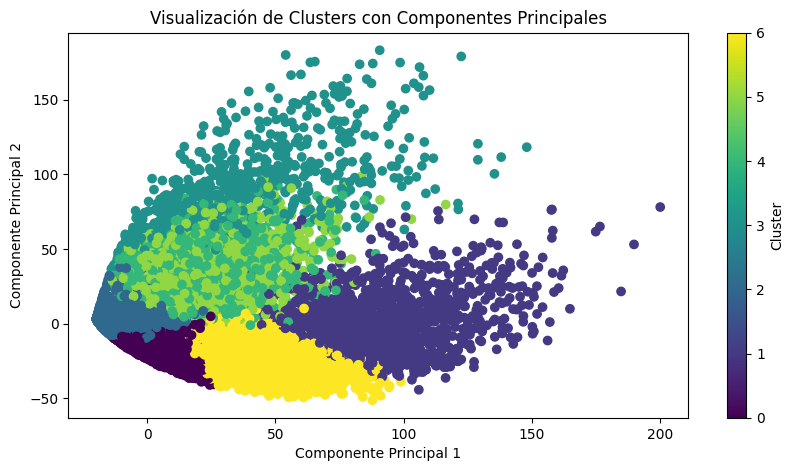

In [29]:
plt.figure(figsize=(10, 5))  # Ajusta el tamaño de la figura según sea necesario
plt.scatter(pca_nombres_df['Componente_1'], pca_nombres_df['Componente_2'], c=pca_nombres_df['Cluster'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de Clusters con Componentes Principales')
plt.colorbar(label='Cluster')
plt.show()
